# Example Notebook

The following notebook presents the workflow and functions required for segmentation and classification of nano-CT Li-ion X-ray CT datasets.

For this iteration, Mask R-CNN **must** be previously installed but future updates could include the package. This example is running on Keras 1.1.2 and GPU enabled Tensorflow 2.2.0.

In [1]:
import eilnn

import os
import tensorflow as tf
from tensorflow import keras
import mrcnn.model as modellib
from mrcnn.model import log
from samples import particles


# Mask R-CNN Model Initailisation

The first step consists in initialising the Mask R-CNN model with the preferred settings. We are loading the weights obtained with training the Mask R-CNN as outlined in the main manuscript. These can be found in the _model/_ folder. The **model_dir** variable should be replaced with the desired log directory for Mask R-CNN

In [2]:
config = particles.ParticlesConfig()

class InferenceConfig(config.__class__):
    GPU_COUNT = 1
    IMAGES_PER_GPU =1
    IMAGE_RESIZE_MODE = 'square'
    IMAGE_MIN_DIM = 768
    IMAGE_MAX_DIM = 1024
    LEARNING_RATE = 0.0001
    LEARNING_MOMENTUM = 0.9
    USE_MINI_MASK = False
    BATCH_SIZE=1
    VALIDATION_STEPS = 100
    NUM_CLASSES = 2
    
config_inference= InferenceConfig()
DEVICE = '/GPU:0'
TEST_MODE = 'inference'

with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode='inference', config = config_inference, model_dir = '/logs')
    
model.load_weights(os.path.join(ROOT_DIR, 'model/mask_rcnn_particles_0450.h5'), by_name=True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Re-starting from epoch 450


# Set Directories
Indicate path where grayscale data for analysis and classifier model are located.

In [3]:
grayscale_dir = '/images/example_segmentation'
model_class = '/model/model_classifier'

The **segment_classify()** function is called to run the segmentation and classification. The arguments required are:

**model** = the Mask R-CNN model initialised previously

**grayscale_dir** = path to the grayscale images

**model_class** = path to the pre-trained classifier model (provided in repo?)

**marker_size** = watershed marker size

**export_path (optional)** = if provided, the invidiual particle segmentations will be saved in the desired path. The watershed segmentation of the full electrode will be saved to the "watershed/" folder in the desired path. Note that the process will overwrite whatever you might have in the folders, so remember to copy your data or change folders when running function.

Loading images in: C:/Users/Sohrab/Documents/crack/eil-nn/images/example_segmentation
Stack Dimensions  (412, 1024, 1008, 3)
Commencing 3D segmentation.
Filtering labels.
Label array dimensions (412, 1024, 1008)



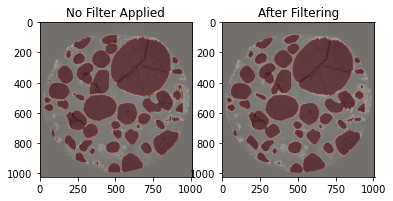

Distance Transform Completed
Extended Minima Found
Watershed Separation Completed
Segmentation took 43.0 minutes
8 partial particles removed.
pristine    85
flawed      40
Name: Particle class, dtype: int64
Saving individual particles in C:/Users/Sohrab/Documents/crack/eil-nn/images/example_segmentation/labels
Saving labels in C:\Users\Sohrab\Documents\crack\eil-nn\images\example_segmentation\labels\watershed/
Complete!


In [4]:
eilnn.segment_classify(model, grayscale_dir, model_class, marker_size=8, export_path = '/images/example_segmentation/labels')